Задание 2.

Сделайте описательные статистики с визуализацией для нескольких дискретных и непрерывных величин на ваш выбор.

Постройте гистограммы распределения значений имеющихся у вас переменных, предположите лежащий в их основе вид распределения.

Для тех, кто хочет заморочиться: придумайте, как привести к нормальному распределению те непрерывные величины, которые у вас распределены ненормально.

Задание выполняется на языке R и предоставляется в формате html/PDF рендера Quarto ноутбука или Google Colab (последнее предпочтительно).

Загрузка файлов

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving high_density_lipids.tsv to high_density_lipids (1).tsv
Saving low_density_lipids.tsv to low_density_lipids (1).tsv
Saving metadata.xlsx to metadata (1).xlsx


Загрузка библиотек

In [ ]:
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
install.packages('readxl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(readxl)

In [ ]:
install.packages('writexl')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(writexl)

Загрузка таблицы hdl

In [ ]:
hdl <- read_tsv("/content/high_density_lipids.tsv") %>%
  select(-Name) %>%
  mutate(Patient.number = as.factor(Patient.number)) %>%
  mutate(Vial.number = as.factor(Vial.number))

Rows: 27 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPHDL1, GPHDL2, GPHDL3, GPHDL4, GPHDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
hdl

Vial.number,Patient.number,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,0.3800000,1.780000,0.1400000,0.05000000,0.730000,2.900000,1.570000,2.570000,⋯,12.23000,58.69000,20.97000,2.870000,29.57000,44.39000,15.06000,0.05000000,7.350000,2.490
3,52,0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,⋯,11.98000,57.50000,21.94000,2.920000,29.60000,43.93000,14.97000,0.05000000,8.710000,1.530
4,53,0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,⋯,15.00000,62.10000,12.74000,4.200000,37.03000,40.68000,7.93000,0.10000000,4.810000,5.080
5,54,0.5000000,1.790000,0.2300000,0.06000000,0.770000,2.960000,1.760000,3.000000,⋯,12.85000,56.02000,22.70000,3.320000,30.01000,41.78000,16.46000,0.06000000,8.850000,2.300
6,55,0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,⋯,13.81000,59.78000,16.14000,3.020000,33.69000,42.18000,10.84000,0.03000000,7.250000,4.330
7,56,0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,⋯,14.61000,60.59000,15.63000,3.750000,35.18000,41.66000,10.24000,0.05000000,5.100000,3.870
8,57,0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,⋯,15.44000,58.98000,15.50000,5.770000,36.60000,38.21000,9.34000,0.08000000,6.150000,3.680
9,58,0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,⋯,13.43000,58.97000,19.18000,3.740000,31.66000,43.64000,12.54000,0.12000000,5.270000,2.940
10,59,0.4200000,1.710000,0.2000000,0.06000000,0.640000,2.840000,1.590000,3.480000,⋯,12.30000,58.45000,20.28000,2.910000,29.13000,44.60000,14.39000,0.06000000,8.630000,2.120


Загрузка таблицы ldl

In [ ]:
ldl <- read_tsv("/content/low_density_lipids.tsv") %>%
  select(-Name) %>%
  mutate(Patient.number = as.factor(Patient.number)) %>%
  mutate(Vial.number = as.factor(Vial.number))

Rows: 29 Columns: 38
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (1): Name
dbl (37): Vial.number, Patient.number, GPLDL1, GPLDL2, GPLDL3, GPLDL4, GPLDL...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
ldl

Vial.number,Patient.number,GPLDL1,GPLDL2,GPLDL3,GPLDL4,GPLDL5,GPLDL6,GPLDL7,GPLDL8,⋯,G1,G2,G3,S0,S1,S2,S3,B,F,HM
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,0.400,6.740,0.20,0.020,1.09,3.790,2.27,2.380,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
3,52,0.460,7.370,0.39,0.020,1.06,4.550,2.71,3.230,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,53,0.300,8.230,0.26,0.020,0.88,3.660,2.32,2.490,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,54,0.470,7.940,0.29,0.020,1.11,3.970,2.55,2.740,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,55,0.310,9.680,0.18,0.020,0.97,4.500,2.24,2.570,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,56,0.300,7.320,0.22,0.020,1.12,4.190,2.37,2.440,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,57,0.470,8.430,0.36,0.030,1.17,4.340,2.66,3.240,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,58,0.350,6.870,0.21,0.050,1.04,3.920,2.77,2.320,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26
10,59,0.350,7.630,0.27,0.020,0.93,3.830,2.29,2.910,⋯,4.480,68.880,4.040,3.860,28.110,43.200,2.230,0.020,2.30,13.11


Загрузка таблицы meta

In [ ]:
meta <- read_xlsx("/content/metadata.xlsx", sheet = 1) %>%
  rename_with(make.names)


In [ ]:
  meta <- meta %>%
    mutate(Patient.number = as.factor(Patient.number)) %>%
    mutate(Vial.number = as.factor(Vial.number))


In [ ]:
meta

Vial.number,Patient.number,Sucrose,Name,Group,Date,Age,Plasma.volume,Ht,Wt,⋯,r.lat.max,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities
<fct>,<fct>,<dbl>,<chr>,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,50,0,"Woodard, Dillon",0,2022-03-26,63,6.5,163,84.0,⋯,0.65,0.80,0.80,0.81,0.78,0.80,0.6425000,1,1,NA
2,51,0,"Kuck, Breanna",0,2023-12-23,47,5.5,179,111.0,⋯,1.03,0.92,1.03,1.03,1.03,1.09,0.8400000,1,0,NA
3,52,0,"Thomas, Terrance",1,2022-10-10,57,7.0,164,80.0,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,53,0,"Moua, Kensue",1,2022-12-21,72,5.0,160,58.8,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
5,54,0,"Soriano, Ryan",1,2023-03-16,57,5.0,180,71.0,⋯,1.20,1.20,1.25,1.10,1.30,1.13,1.0983333,1,1,NA
6,55,0,"Munoz-Lujan, Evangelina",1,2023-03-25,79,6.2,160,64.0,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"
7,56,0,"Silas, Gurinder",1,2022-01-06,61,6.5,164,67.0,⋯,0.91,0.86,0.86,0.80,0.74,0.91,0.6725000,1,0,chronic cholecystitis
8,57,0,"Matt, Gage",1,2022-01-27,70,5.5,162,61.0,⋯,1.00,1.00,1.00,0.94,0.69,0.87,0.7850000,1,0,"Cholecystectomy 20 years ago, hr.gastritis"
9,58,0,"Lords, Aaran",0,2023-10-20,50,6.0,150,79.0,⋯,1.09,1.26,1.03,0.80,0.74,0.75,0.8491667,1,0,Iron-deficiency anemia


Загрузка таблицы descriptive

In [ ]:
descriptive <- read_xlsx("/content/metadata.xlsx", sheet = 2) %>%
  rename('Variable' = '...1', 'Description' = '...2') %>%
  drop_na()

In [ ]:
descriptive

Variable,Description
<chr>,<chr>
Ht,growth
Wt,the weight
BMI,body mass index
Sys,Systolic blood pressure
Dia,Diastolic blood pressure
PR,pulse
Sm,smoking
Dm,diabetes
HT,hypertension


Объединение таблиц hdl и ldl c добавлением суффиксов

In [ ]:
lipids <- full_join(hdl, ldl, by = c('Vial.number', 'Patient.number'), suffix = c('_hdl', '_ldl'))

In [ ]:
lipids

Vial.number,Patient.number,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,⋯,G1_ldl,G2_ldl,G3_ldl,S0_ldl,S1_ldl,S2_ldl,S3_ldl,B_ldl,F_ldl,HM_ldl
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,50,0.3800000,1.780000,0.1400000,0.05000000,0.730000,2.900000,1.570000,2.570000,⋯,4.090,68.910,3.570,3.980,28.180,42.460,1.950,0.020,1.67,13.02
3,52,0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,⋯,5.160,68.220,3.110,4.640,30.430,39.860,1.560,0.020,1.69,14.16
4,53,0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,⋯,3.950,68.030,4.500,3.780,29.370,41.130,2.200,0.020,1.89,13.89
5,54,0.5000000,1.790000,0.2300000,0.06000000,0.770000,2.960000,1.760000,3.000000,⋯,4.630,66.910,4.030,4.440,28.540,40.640,1.950,0.020,2.03,14.25
6,55,0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,⋯,4.050,64.010,5.270,3.720,26.710,40.390,2.510,0.020,2.70,16.06
7,56,0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,⋯,4.100,65.990,4.700,4.030,28.440,39.990,2.330,0.020,1.61,13.82
8,57,0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,⋯,5.270,67.260,3.240,4.690,32.270,37.290,1.520,0.030,1.61,14.59
9,58,0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,⋯,3.970,67.590,4.220,4.420,27.990,41.190,2.180,0.050,1.55,13.26
10,59,0.4200000,1.710000,0.2000000,0.06000000,0.640000,2.840000,1.590000,3.480000,⋯,4.480,68.880,4.040,3.860,28.110,43.200,2.230,0.020,2.30,13.11


Анонимизация данных

In [ ]:
patient_data <- meta %>%
  select(Vial.number, Patient.number, Name, Date, Age, Group)

meta <- meta %>%
  select(-Name, -Date, -Age)

Добавим в таблицу meta описания заголовков

In [ ]:
descriptive$Variable[10] <- 'LVH'

In [ ]:
attr(meta$Ht, "label") <- "growth"
attr(meta$Wt, "label") <- "the weight"
attr(meta$BMI, "label") <- "body mass index"
attr(meta$Sys, "label") <- "Systolic blood pressure"
attr(meta$Dia, "label") <- "Diastolic blood pressure"
attr(meta$PR, "label") <- "pulse"
attr(meta$Sm, "label") <- "smoking"
attr(meta$Dm, "label") <- "diabetes"
attr(meta$HT, "label") <- "hypertension"
attr(meta$LVH, "label") <- "Left ventricular hypertrophy by electrocardiogram"
attr(meta$MI, "label") <- "medical history of infarction"
attr(meta$Str, "label") <- "medical history of stroke"
attr(meta$A_C, "label") <- "family history of CAD"
attr(meta$A_H, "label") <- "family history hypertension"
attr(meta$A_D, "label") <- "family history diabetes"
attr(meta$Choi...25, "label") <- "cholesterol"
attr(meta$Choi...29, "label") <- "cholesterol"
attr(meta$Tgi...26, "label") <- "Triglycerides"
attr(meta$Tgi...30, "label") <- "Triglycerides"
attr(meta$HDLi...27, "label") <- "High density lipoprotein"
attr(meta$HDLi...31, "label") <- "High density lipoprotein"
attr(meta$LDLi...28, "label") <- "Low density lipoprotein"
attr(meta$LDLi...32, "label") <- "Low density lipoprotein"
attr(meta$AI, "label") <- "Atherogenicity index"
attr(meta$r.lat.min, "label") <- "Минимальная толщина интима-медиального слоя правой латеральной сонной артерии"
attr(meta$r.ant.min, "label") <- "Минимальная толщина интима-медиального слоя правой передней сонной артерии"
attr(meta$r.pos.min, "label") <- "Минимальная толщина интима-медиального слоя правой задней сонной артерии"
attr(meta$l.lat.min, "label") <- "Минимальная толщина интима-медиального слоя левой латеральной сонной артерии"
attr(meta$l.ant.min, "label") <- "Минимальная толщина интима-медиального слоя левой передней сонной артерии"
attr(meta$l.pos.min, "label") <- "Минимальная толщина интима-медиального слоя левой задней сонной артерии"
attr(meta$r.lat.max, "label") <- "Максимальная толщина интима-медиального слоя правой латеральной сонной артерии"
attr(meta$r.ant.max, "label") <- "Максимальная толщина интима-медиального слоя правой передней сонной артерии"
attr(meta$r.pos.max, "label") <- "Максимальная толщина интима-медиального слоя правой задней сонной артерии"
attr(meta$l.lat.max, "label") <- "Максимальная толщина интима-медиального слоя левой латеральной сонной артерии"
attr(meta$l.ant.max, "label") <- "Максимальная толщина интима-медиального слоя левой передней сонной артерии"
attr(meta$l.pos.max, "label") <- "Максимальная толщина интима-медиального слоя левой задней сонной артерии"
attr(meta$carotid.IMT.mean, "label") <- "Средняя толщина интима-медиального слоя сонных артерий"
attr(meta$Plaque, "label") <- "Наличие бляшек"
attr(meta$Statins, "label") <- "Прием статинов"
attr(meta$comorbidities, "label") <- "сопутствующие заболевания"

## Препроцессинг данных

In [ ]:
# для большей наглядности объединим таблицы липидов и метаданных
data <- full_join(lipids, meta, by = c('Vial.number', 'Patient.number')) %>%
  drop_na() %>%
  as_tibble

In [ ]:
data

Vial.number,Patient.number,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,⋯,r.lat.max,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
3,52,0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,⋯,1.00,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016
4,53,0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,⋯,0.91,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar)
6,55,0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,⋯,0.88,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland"
7,56,0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,⋯,0.91,0.86,0.86,0.80,0.74,0.91,0.6725000,1,0,chronic cholecystitis
8,57,0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,⋯,1.00,1.00,1.00,0.94,0.69,0.87,0.7850000,1,0,"Cholecystectomy 20 years ago, hr.gastritis"
9,58,0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,⋯,1.09,1.26,1.03,0.80,0.74,0.75,0.8491667,1,0,Iron-deficiency anemia
10,59,0.4200000,1.710000,0.2000000,0.06000000,0.640000,2.840000,1.590000,3.480000,⋯,0.97,1.04,0.81,0.63,0.63,0.86,0.7041667,2,0,Type 2 diabetes mellitus
11,60,0.3500000,2.000000,0.2100000,0.06000000,0.670000,2.570000,1.710000,3.790000,⋯,0.75,0.80,0.70,0.90,0.90,0.85,0.7458333,2,1,"Nodal goiter (L-thyroxine, 100 μg)"
12,61,0.3000000,1.940000,0.1500000,0.07000000,0.790000,2.330000,1.610000,2.720000,⋯,0.64,0.62,0.69,1.12,1.12,1.06,0.7758333,2,0,Cholecystectomy in September 2016


Перевод качественных величин в factor и величины для подсчета колонки risk в numeric

In [ ]:
data <- data %>%
    mutate(Patient.number = as.factor(Patient.number)) %>%
    mutate(Vial.number = as.factor(Vial.number)) %>%
    mutate(Sucrose = as.factor(Sucrose)) %>%
    mutate(Group = as.factor(Group)) %>%
    mutate(Sm = as.numeric(Sm)) %>%
    mutate(Dm = as.numeric(Dm)) %>%
    mutate(HT = as.numeric(HT)) %>%
    mutate(LVH = as.numeric(LVH)) %>%
    mutate(IHD = as.numeric(IHD)) %>%
    mutate(MI = as.numeric(MI)) %>%
    mutate(Str = as.numeric(Str)) %>%
    mutate(A_C = as.numeric(A_C)) %>%
    mutate(A_H = as.numeric(A_H)) %>%
    mutate(A_D = as.numeric(A_D)) %>%
    mutate(Statins = as.factor(Statins)) %>%
    mutate(Plaque = as.factor(Plaque))

Факторы риска для атеросклероза:

Sm - курение

Dm - диабет

HT - артериальная гипертензия

LVH - левожелудочковая гипертрофия

IHD - ишемическая болезнь сердца

MI - анамнез инфаркта миокарда

Str - анамнез инсульта

A_C - семейный анамнез ИБС

A_H - семейный анамнез артериальной гипертензии

A_D - семейный анамнез диабета

Объединим риски в один признак risk (от 0 - низкий риск до 10 - высокий риск)

In [ ]:
data <- data %>%
  mutate(risk = factor(case_when(data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 0 ~ "0",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 1 ~ "1",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 2 ~ "2",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 3 ~ "3",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 4 ~ "4",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 5 ~ "5",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 6 ~ "6",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 7 ~ "7",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 8 ~ "8",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 9 ~ "9",
                                 data$Sm + data$Dm + data$HT + data$LVH + data$IHD + data$MI + data$Str + data$A_C + data$A_H + data$A_D == 10 ~ "10"
                                 )))

In [ ]:
data

Vial.number,Patient.number,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,⋯,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities,risk
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>
3,52,0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,⋯,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016,7
4,53,0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,⋯,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar),0
6,55,0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,⋯,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland",3
7,56,0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,⋯,0.86,0.86,0.80,0.74,0.91,0.6725000,1,0,chronic cholecystitis,2
8,57,0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,⋯,1.00,1.00,0.94,0.69,0.87,0.7850000,1,0,"Cholecystectomy 20 years ago, hr.gastritis",4
9,58,0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,⋯,1.26,1.03,0.80,0.74,0.75,0.8491667,1,0,Iron-deficiency anemia,4
10,59,0.4200000,1.710000,0.2000000,0.06000000,0.640000,2.840000,1.590000,3.480000,⋯,1.04,0.81,0.63,0.63,0.86,0.7041667,2,0,Type 2 diabetes mellitus,6
11,60,0.3500000,2.000000,0.2100000,0.06000000,0.670000,2.570000,1.710000,3.790000,⋯,0.80,0.70,0.90,0.90,0.85,0.7458333,2,1,"Nodal goiter (L-thyroxine, 100 μg)",5
12,61,0.3000000,1.940000,0.1500000,0.07000000,0.790000,2.330000,1.610000,2.720000,⋯,0.62,0.69,1.12,1.12,1.06,0.7758333,2,0,Cholecystectomy in September 2016,1


In [ ]:
# возвращаем обратно в фактор
data <- data %>%
  mutate(Sm = as.factor(Sm)) %>%
  mutate(Dm = as.factor(Dm)) %>%
  mutate(HT = as.factor(HT)) %>%
  mutate(LVH = as.factor(LVH)) %>%
  mutate(IHD = as.factor(IHD)) %>%
  mutate(MI = as.factor(MI)) %>%
  mutate(Str = as.factor(Str)) %>%
  mutate(A_C = as.factor(A_C)) %>%
  mutate(A_H = as.factor(A_H)) %>%
  mutate(A_D = as.factor(A_D))

In [ ]:
data

Vial.number,Patient.number,GPHDL1,GPHDL2,GPHDL3,GPHDL4,GPHDL5,GPHDL6,GPHDL7,GPHDL8,⋯,r.ant.max,r.pos.max,l.lat.max,l.ant.max,l.pos.max,carotid.IMT.mean,Plaque,Statins,comorbidities,risk
<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<fct>,<chr>,<fct>
3,52,0.4300000,1.300000,0.2300000,0.05000000,0.590000,2.620000,1.620000,3.860000,⋯,0.90,0.95,0.85,0.90,0.90,0.8500000,3,1,Type 2 diabetes mellitus; MI - 2016,7
4,53,0.4100000,3.860000,0.3100000,0.10000000,0.960000,3.190000,2.420000,3.750000,⋯,0.97,0.98,0.86,0.74,0.80,0.8241667,2,0,1-2 times per year hypertensive crises (Corinfar),0
6,55,0.4000000,3.690000,0.1700000,0.03000000,0.800000,3.040000,1.620000,3.230000,⋯,0.80,0.90,1.07,1.00,1.30,0.8475000,2,0,"Cholecystitis, gastritis without exacerbation. Diffuse focal changes in the thyroid gland",3
7,56,0.3700000,2.960000,0.2200000,0.05000000,1.000000,3.000000,2.110000,3.060000,⋯,0.86,0.86,0.80,0.74,0.91,0.6725000,1,0,chronic cholecystitis,2
8,57,0.5600000,2.760000,0.4600000,0.08000000,1.110000,2.960000,3.560000,4.170000,⋯,1.00,1.00,0.94,0.69,0.87,0.7850000,1,0,"Cholecystectomy 20 years ago, hr.gastritis",4
9,58,0.4100000,2.140000,0.2200000,0.12000000,0.930000,2.550000,2.060000,2.950000,⋯,1.26,1.03,0.80,0.74,0.75,0.8491667,1,0,Iron-deficiency anemia,4
10,59,0.4200000,1.710000,0.2000000,0.06000000,0.640000,2.840000,1.590000,3.480000,⋯,1.04,0.81,0.63,0.63,0.86,0.7041667,2,0,Type 2 diabetes mellitus,6
11,60,0.3500000,2.000000,0.2100000,0.06000000,0.670000,2.570000,1.710000,3.790000,⋯,0.80,0.70,0.90,0.90,0.85,0.7458333,2,1,"Nodal goiter (L-thyroxine, 100 μg)",5
12,61,0.3000000,1.940000,0.1500000,0.07000000,0.790000,2.330000,1.610000,2.720000,⋯,0.62,0.69,1.12,1.12,1.06,0.7758333,2,0,Cholecystectomy in September 2016,1


In [ ]:
write_rds(data, "data.rds")

In [ ]:
write_xlsx(data, "data.xlsx")

## Сделайте описательные статистики с визуализацией для нескольких дискретных и непрерывных величин на ваш выбор.

In [ ]:
install.packages('skimr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(skimr)

## Описательная статистика

In [ ]:
skimr::skim(select(data, where(is.factor)))

── Data Summary ────────────────────────
                           Values                      
Name                       select(data, where(is.fac...
Number of rows             18                          
Number of columns          17                          
_______________________                                
Column type frequency:                                 
  factor                   17                          
________________________                               
Group variables            None                        

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable  n_missing complete_rate ordered n_unique
 1 Vial.number            0             1 FALSE         18
 2 Patient.number         0             1 FALSE         18
 3 Sucrose                0             1 FALSE          2
 4 Group                  0             1 FALSE          2
 5 Sm                     0             1 FALSE          2
 6 Dm              

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 7' in coercion to 'logical(1)'


In [ ]:
skimr::skim(select(data, where(is.numeric)))

── Data Summary ────────────────────────
                           Values                      
Name                       select(data, where(is.num...
Number of rows             18                          
Number of columns          99                          
_______________________                                
Column type frequency:                                 
  numeric                  99                          
________________________                               
Group variables            None                        

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable    n_missing complete_rate     mean      sd      p0      p25
 1 GPHDL1                   0             1   0.464   0.0991   0.3     0.41  
 2 GPHDL2                   0             1   2.63    0.670    1.3     2.15  
 3 GPHDL3                   0             1   0.251   0.0763   0.15    0.202 
 4 GPHDL4                   0             1   0.0759  0.0316 

ERROR: Error in is.null(text_repr) || nchar(text_repr) == 0L: 'length = 12' in coercion to 'logical(1)'


In [ ]:
install.packages('psych')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [ ]:
library(psych)


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




Группировка по Group в разрезе Коэффициента атерогенности

In [ ]:
desc_group_ai <- data %>%
  group_by(Group) %>%
  #select(where(is.numeric)) %>%
  summarise(psych::describe(AI))

In [ ]:
desc_group_ai

Group,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,3,2.028082,0.7274934,1.838509,2.028082,0.6291679,1.4141414,2.831595,1.417453,0.2428886,-2.3333333,0.4200185
1,1,15,3.017413,0.9837496,3.184258,3.095076,0.6495168,0.5657407,4.459459,3.893719,-0.7746087,0.2355548,0.2540030


Группировка по risk в разрезе Коэффициента атерогенности

In [ ]:
desc_risk_ai <- data %>%
  group_by(risk) %>%
  #select(where(is.numeric)) %>%
  summarise(psych::describe(AI))

In [ ]:
desc_risk_ai

risk,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,1,3.622351,NA,3.622351,3.622351,0.0000000,3.6223507,3.622351,0.000000,NA,NA,NA
1,1,4,2.095936,0.5940448,2.098052,2.095936,0.6931069,1.4141414,2.773498,1.359356,-0.005975378,-2.124870,0.2970224
2,1,1,3.207856,NA,3.207856,3.207856,0.0000000,3.2078560,3.207856,0.000000,NA,NA,NA
3,1,3,3.323182,1.0931128,3.231018,3.323182,1.4113581,2.2790698,4.459459,2.180390,0.083714492,-2.333333,0.6311090
4,1,4,3.299521,0.4992889,3.179848,3.299521,0.2614291,2.8315946,4.006791,1.175197,0.497927419,-1.798835,0.2496445
5,1,3,2.200498,1.8143290,1.883212,2.200498,1.9532824,0.5657407,4.152542,3.586802,0.169530009,-2.333333,1.0475033
6,1,1,2.787234,NA,2.787234,2.787234,0.0000000,2.7872340,2.787234,0.000000,NA,NA,NA
7,1,1,3.575130,NA,3.575130,3.575130,0.0000000,3.5751295,3.575130,0.000000,NA,NA,NA


Группировка по наличию артериальной гипертензии в разрезе Коэффициента атерогенности

In [ ]:
desc_ht_ai <- data %>%
  group_by(HT) %>%
  #select(where(is.numeric)) %>%
  summarise(psych::describe(AI))

In [ ]:
desc_ht_ai

HT,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,5,3.027348,0.4799873,3.175439,3.027348,0.5959176,2.3575949,3.622351,1.264756,-0.1754525,-1.748100,0.2146569
1,1,13,2.785285,1.1518455,2.831595,2.834864,1.4060726,0.5657407,4.459459,3.893719,-0.2772789,-1.104913,0.3194645


Группировка по наличию левожелудочковой гипертрофии в разрезе Коэффициента атерогенности

In [ ]:
desc_lvh_ai <- data %>%
  group_by(LVH) %>%
  #select(where(is.numeric)) %>%
  summarise(psych::describe(AI))

In [ ]:
desc_lvh_ai

LVH,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,10,2.796833,0.8855523,2.802546,2.761841,0.7178954,1.4141414,4.459459,3.045318,0.2216277,-0.9243644,0.2800362
1,1,8,2.922138,1.1908285,3.203228,2.922138,0.9040577,0.5657407,4.152542,3.586802,-0.7953745,-0.7704449,0.4210215


Группировка по наличию ишемической болезни сердца в разрезе Коэффициента атерогенности

In [ ]:
desc_ihd_ai <- data %>%
  group_by(IHD) %>%
  #select(where(is.numeric)) %>%
  summarise(psych::describe(AI))

In [ ]:
desc_ihd_ai

IHD,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,6,2.472948,0.7844711,2.565546,2.472948,0.7361741,1.4141414,3.622351,2.208209,0.05105498,-1.59652183,0.3202590
1,1,12,3.042312,1.0736701,3.196057,3.148255,0.9040577,0.5657407,4.459459,3.893719,-0.80316469,-0.09850772,0.3099418


Группировка по наличию бляшек в разрезе Коэффициента атерогенности

In [ ]:
desc_plaque_ai <- data %>%
  group_by(Plaque) %>%
  #select(where(is.numeric)) %>%
  summarise(psych::describe(AI))

In [ ]:
desc_plaque_ai

Plaque,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,6,2.457768,0.7378347,2.555332,2.457768,0.9434007,1.4141414,3.207856,1.793715,-0.2223817,-1.9114439,0.3012198
2,1,11,3.002154,1.1237742,3.184258,3.110944,1.2194883,0.5657407,4.459459,3.893719,-0.6575850,-0.4682746,0.3388307
3,1,1,3.575130,NA,3.575130,3.575130,0.0000000,3.5751295,3.575130,0.000000,NA,NA,NA


Группировка по приему статинов в разрезе Коэффициента атерогенности

In [ ]:
desc_statins_ai <- data %>%
  group_by(Statins) %>%
  #select(where(is.numeric)) %>%
  summarise(psych::describe(AI))

In [ ]:
desc_statins_ai

Statins,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,1,13,3.132535,0.7726978,3.175439,3.129544,0.6625918,1.8385093,4.459459,2.620950,0.136085083,-1.153172,0.2143078
1,1,5,2.124496,1.2469936,1.883212,2.124496,1.9289307,0.5657407,3.575130,3.009389,0.008560971,-2.019760,0.5576725


## Постройте гистограммы распределения значений имеющихся у вас переменных, предположите лежащий в их основе вид распределения.

Непрерывные величины:

AI - Коэффициент атерогенности (соотношение ЛПНП/ЛПВП)

HDLi...27 - Уровень "хорошего" ЛПВП-холестерина

LDLi...28 - Уровень "плохого" ЛПНП-холестерина (мг/дл)

carotid.IMT.mean - Средняя толщина интима-медиального слоя сонных артерий (мм)

Choi...29 - Соотношение общего холестерина/ЛПВП

Warning message in self$trans$transform(x):
“NaNs produced”
Warning message:
“Transformation introduced infinite values in continuous x-axis”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


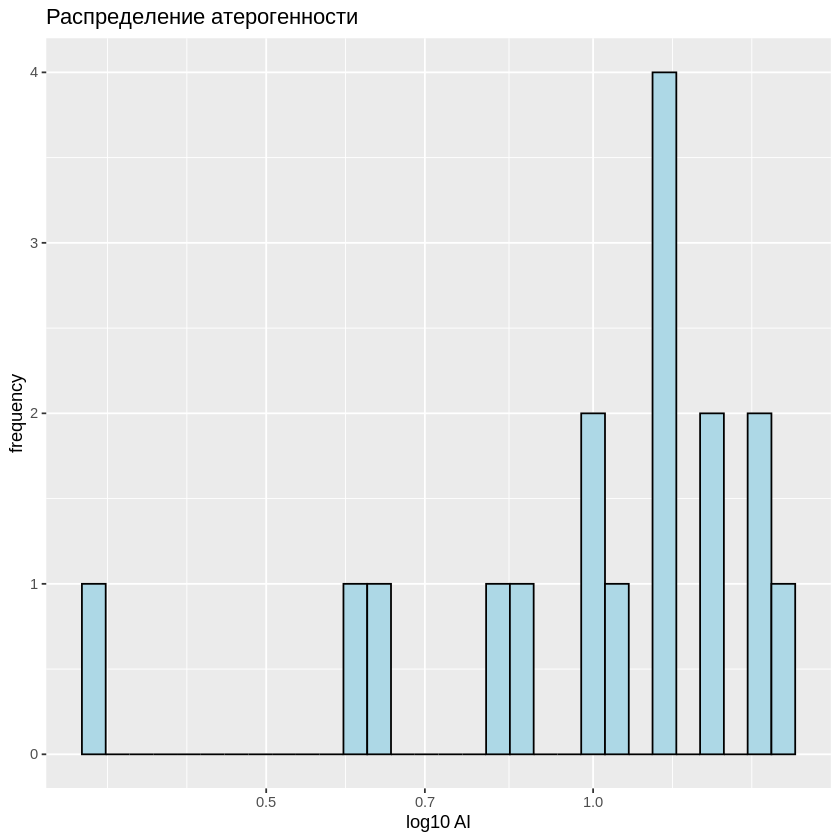

In [ ]:
ggplot(data, aes(log(AI))) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение атерогенности") +
  scale_x_log10(name = "log10 AI") +
  scale_y_continuous(name = "frequency")
# непрерывное распределение, логнормальное

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


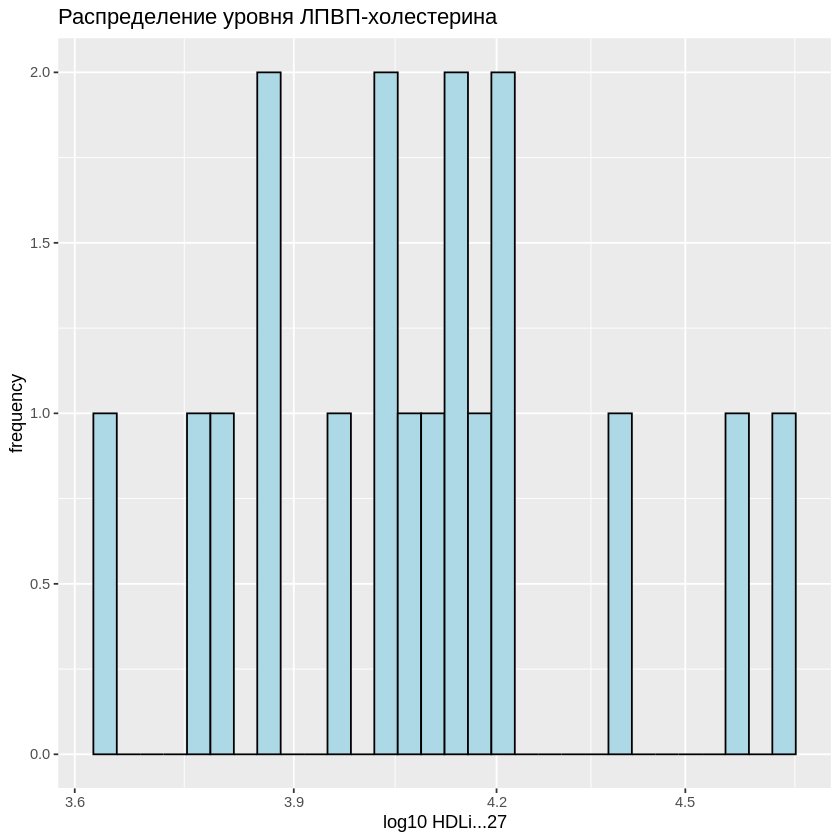

In [ ]:
ggplot(data, aes(log(HDLi...27))) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение уровня ЛПВП-холестерина") +
  scale_x_log10(name = "log10 HDLi...27") +
  scale_y_continuous(name = "frequency")
# непрерывное распределение, нормальное

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


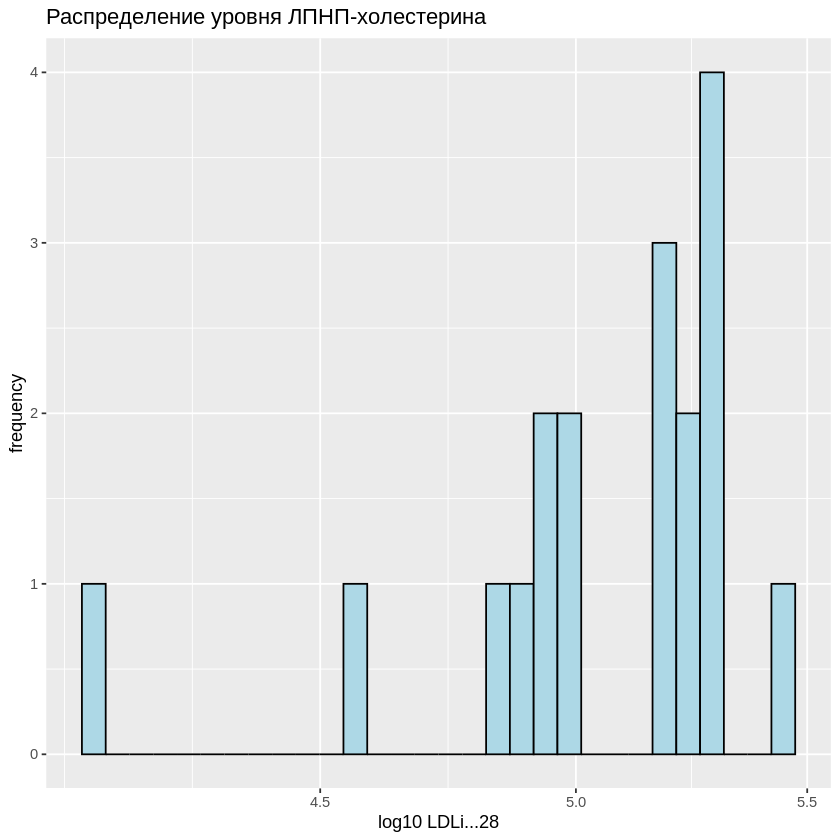

In [ ]:
ggplot(data, aes(log(LDLi...28))) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение уровня ЛПНП-холестерина") +
  scale_x_log10(name = "log10 LDLi...28") +
  scale_y_continuous(name = "frequency")
# непрерывное распределение, логнормальное

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


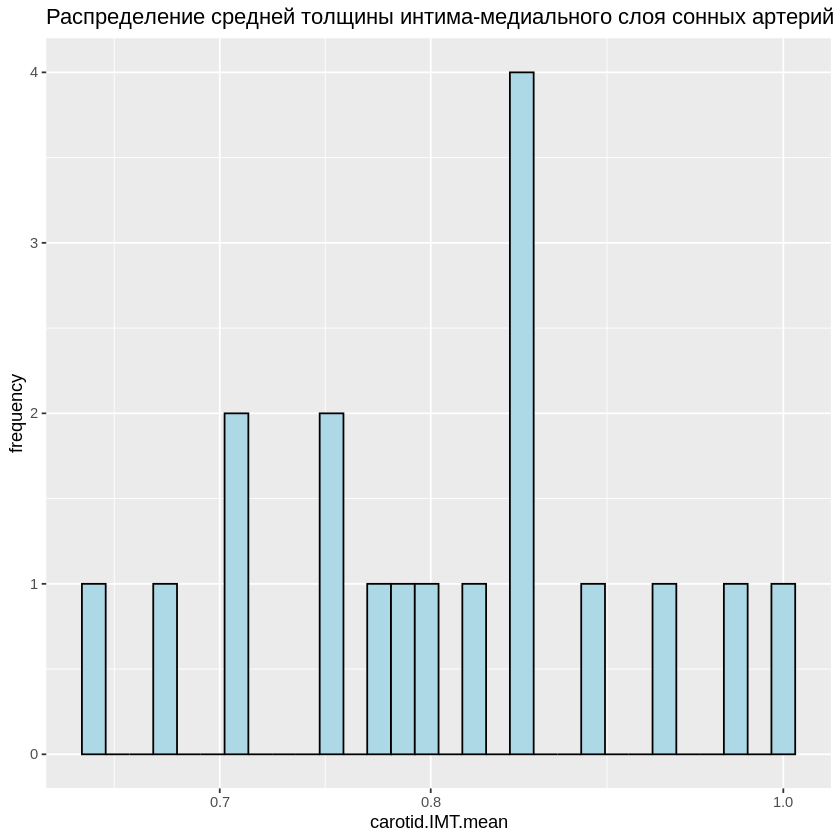

In [ ]:
ggplot(data, aes(carotid.IMT.mean)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение средней толщины интима-медиального слоя сонных артерий") +
  scale_x_log10(name = "carotid.IMT.mean") +
  scale_y_continuous(name = "frequency")
# непрерывное распределение, логнормальное

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


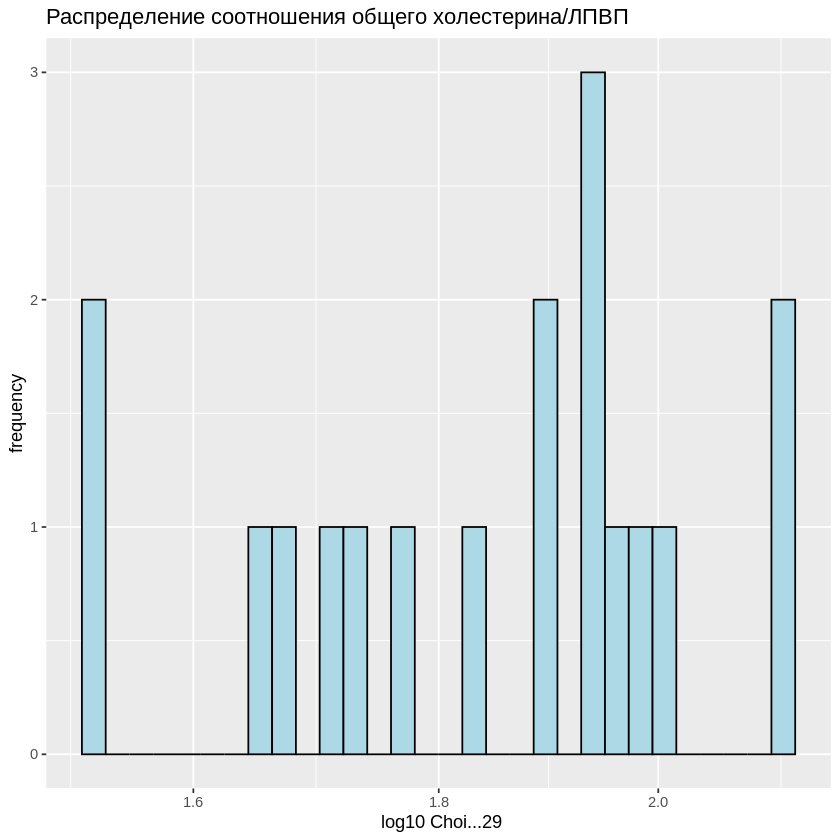

In [ ]:
ggplot(data, aes(log(Choi...29))) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение соотношения общего холестерина/ЛПВП") +
  scale_x_log10(name = " log10 Choi...29") +
  scale_y_continuous(name = "frequency")
# непрерывное распределение, бимодальное

Дискретные величины:

Sys - систолическое артериальное давление

Dia - диастолическое артериальное давление

PR - пульс

Choi...25 - Общий уровень холестерина (мг/дл)

Tgi...26 - Уровень триглицеридов (мг/дл)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


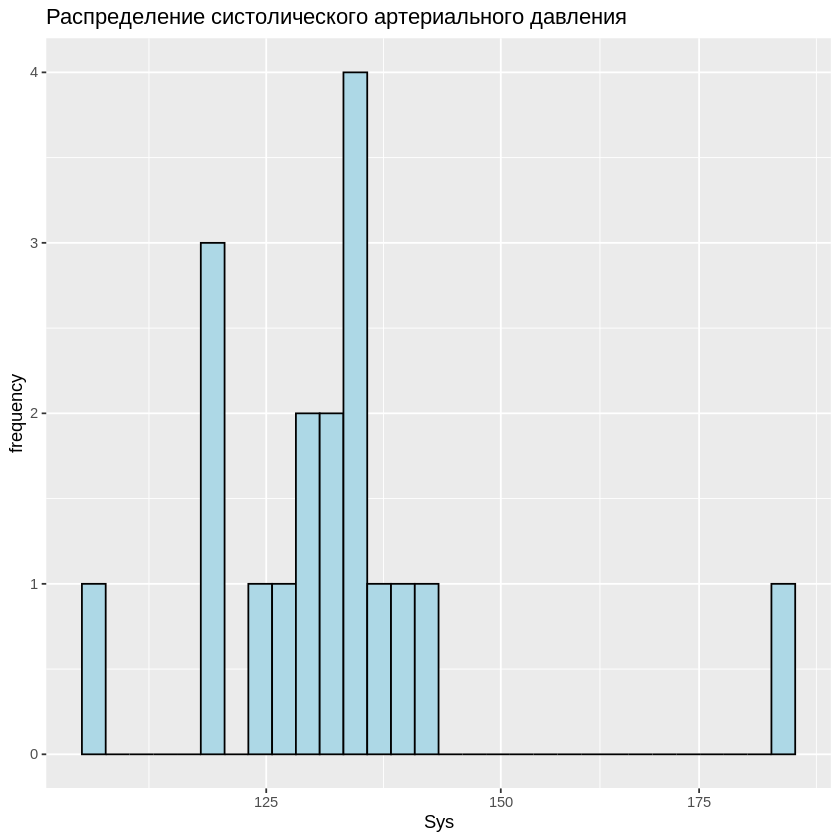

In [ ]:
ggplot(data, aes(Sys)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение систолического артериального давления") +
  scale_x_log10(name = "Sys") +
  scale_y_continuous(name = "frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


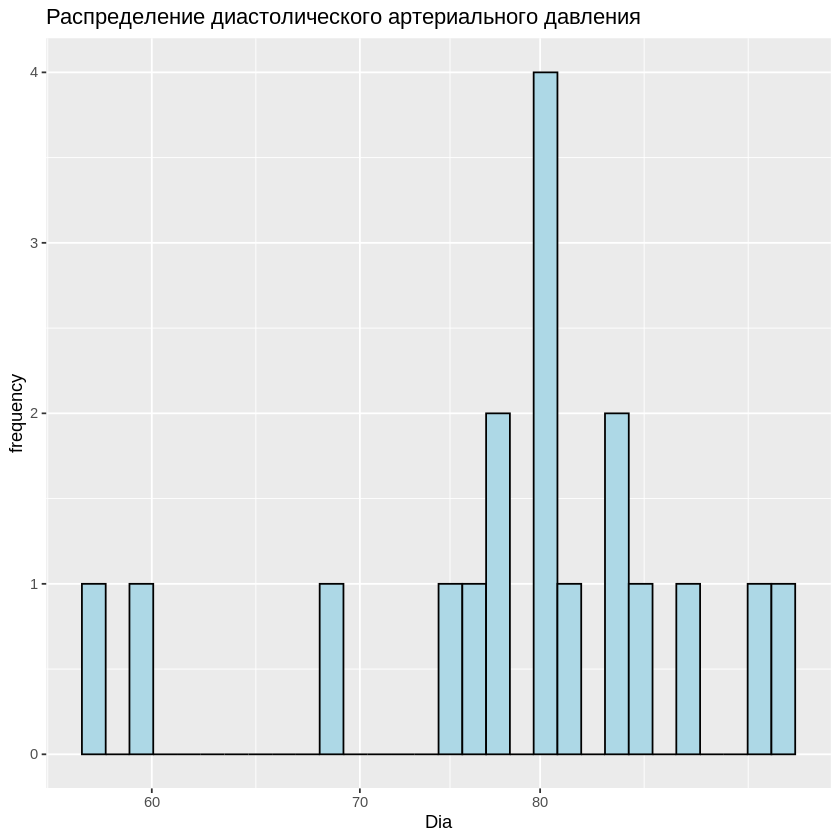

In [ ]:
ggplot(data, aes(Dia)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение диастолического артериального давления") +
  scale_x_log10(name = "Dia") +
  scale_y_continuous(name = "frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


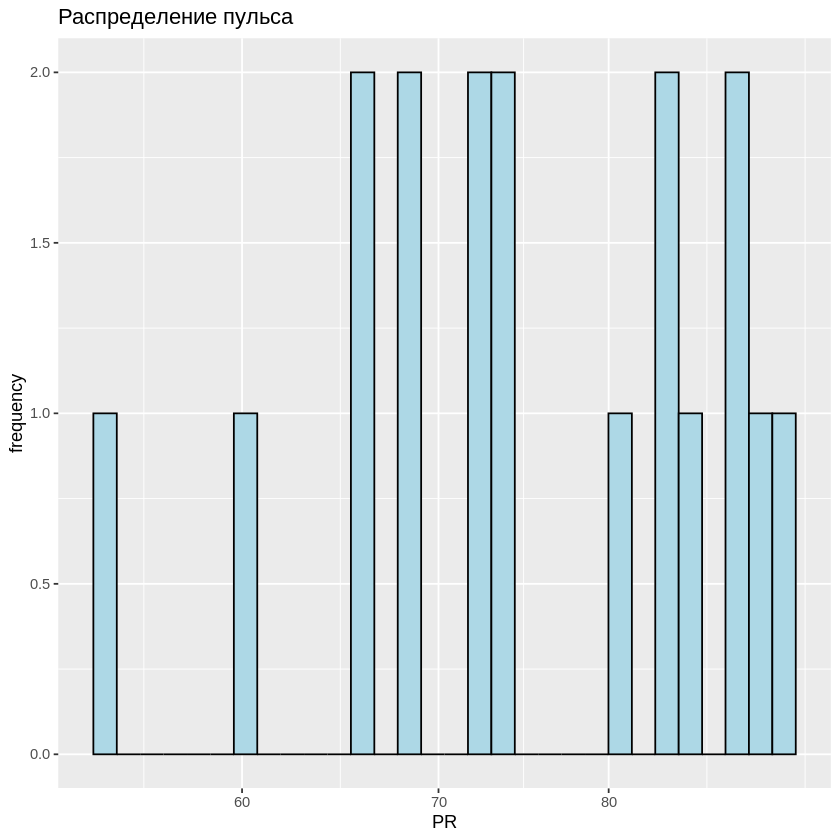

In [ ]:
ggplot(data, aes(PR)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение пульса") +
  scale_x_log10(name = "PR") +
  scale_y_continuous(name = "frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


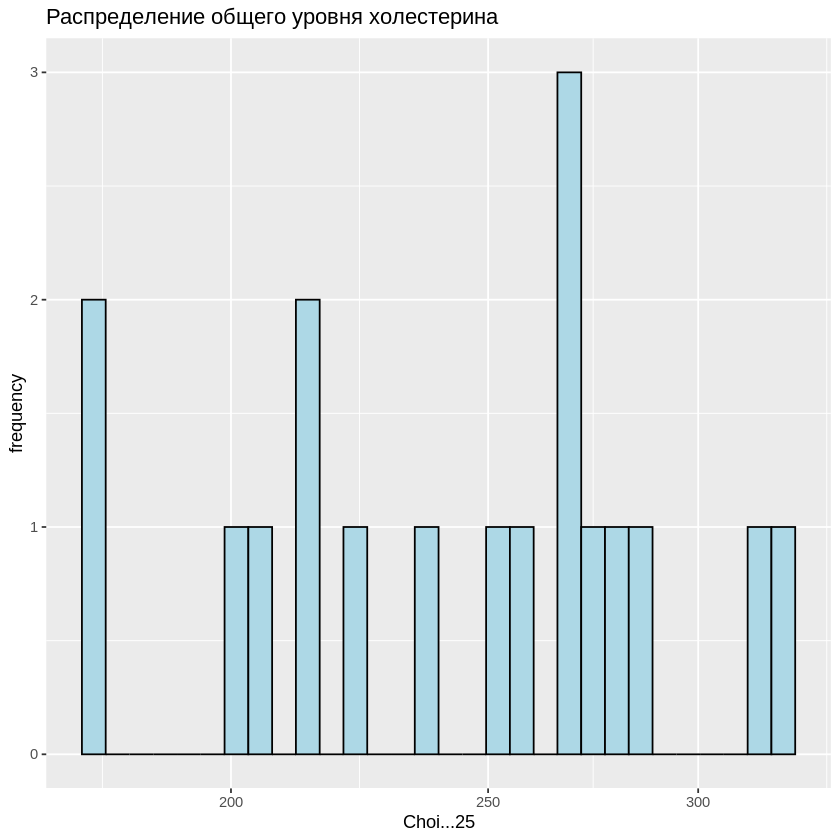

In [ ]:
ggplot(data, aes(Choi...25)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение общего уровня холестерина") +
  scale_x_log10(name = "Choi...25") +
  scale_y_continuous(name = "frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


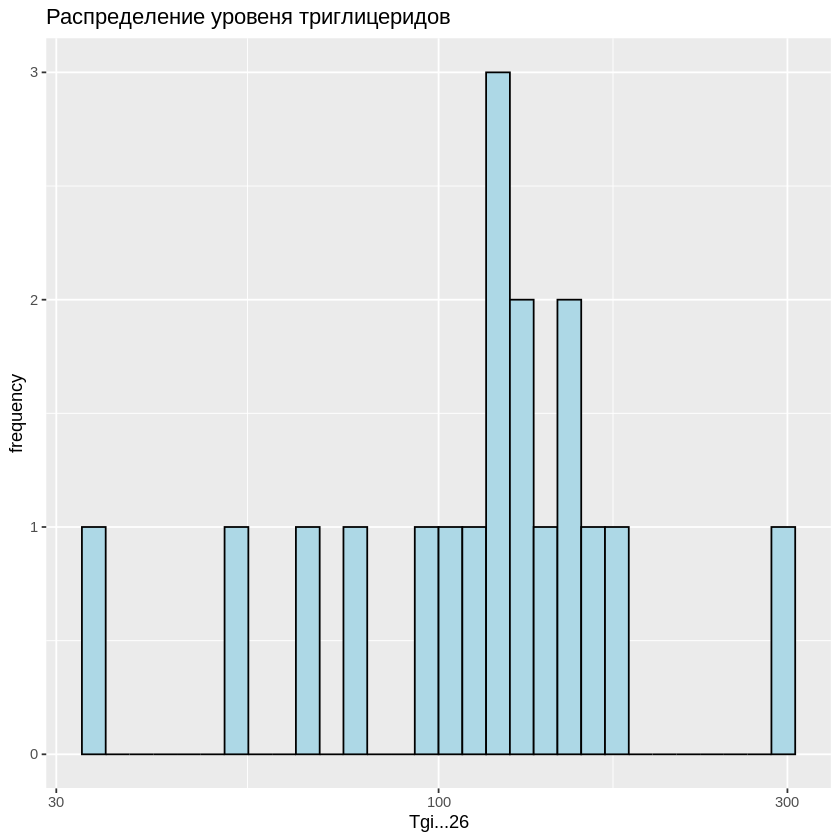

In [ ]:
ggplot(data, aes(Tgi...26)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение уровеня триглицеридов") +
  scale_x_log10(name = "Tgi...26") +
  scale_y_continuous(name = "frequency")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


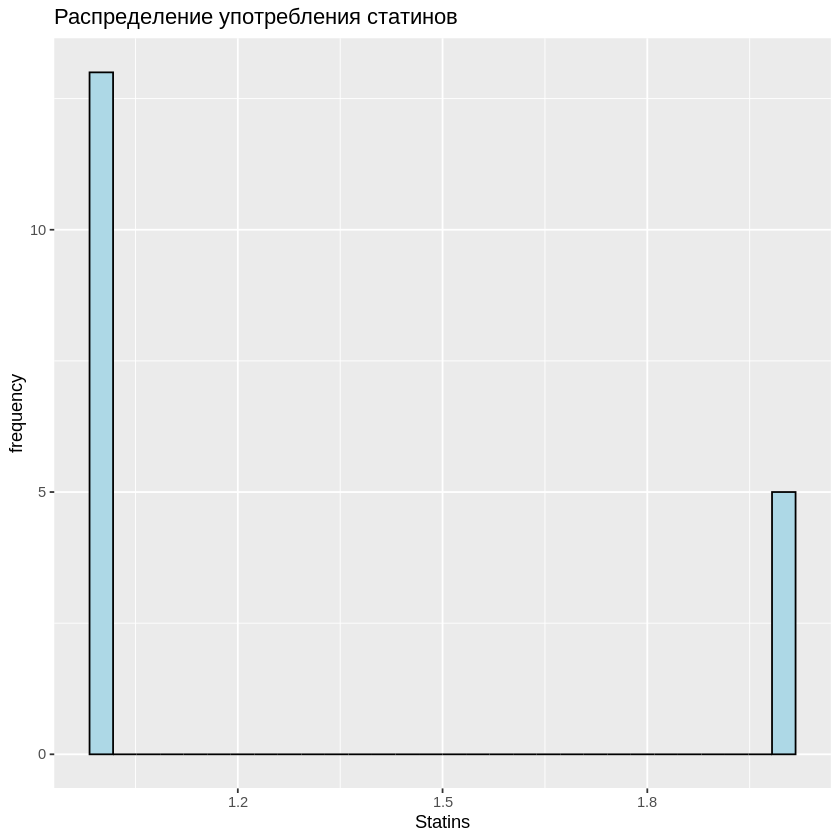

In [ ]:
data <- data %>%
  mutate(Statins = as.numeric(Statins))

ggplot(data, aes(Statins)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение употребления статинов") +
  scale_y_continuous(name = "frequency")
# распределение биномиальное

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


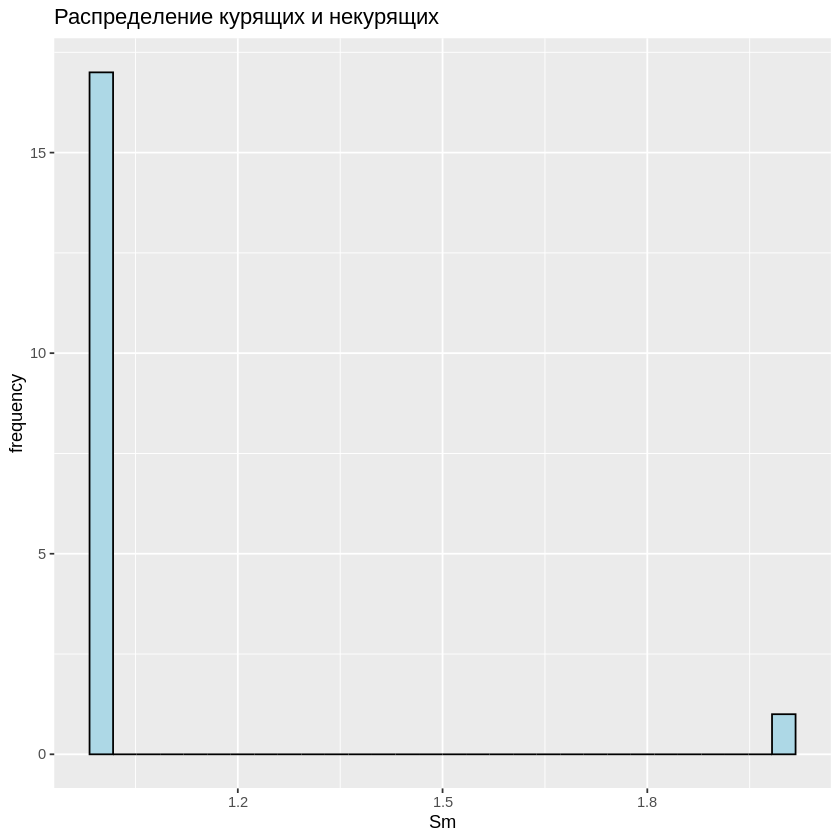

In [ ]:
data <- data %>%
  mutate(Sm = as.numeric(Sm))

ggplot(data, aes(Sm)) +
  geom_histogram(color='black', fill='lightblue') +
  ggtitle("Распределение курящих и некурящих") +
  scale_y_continuous(name = "frequency")
# распределение биномиальное

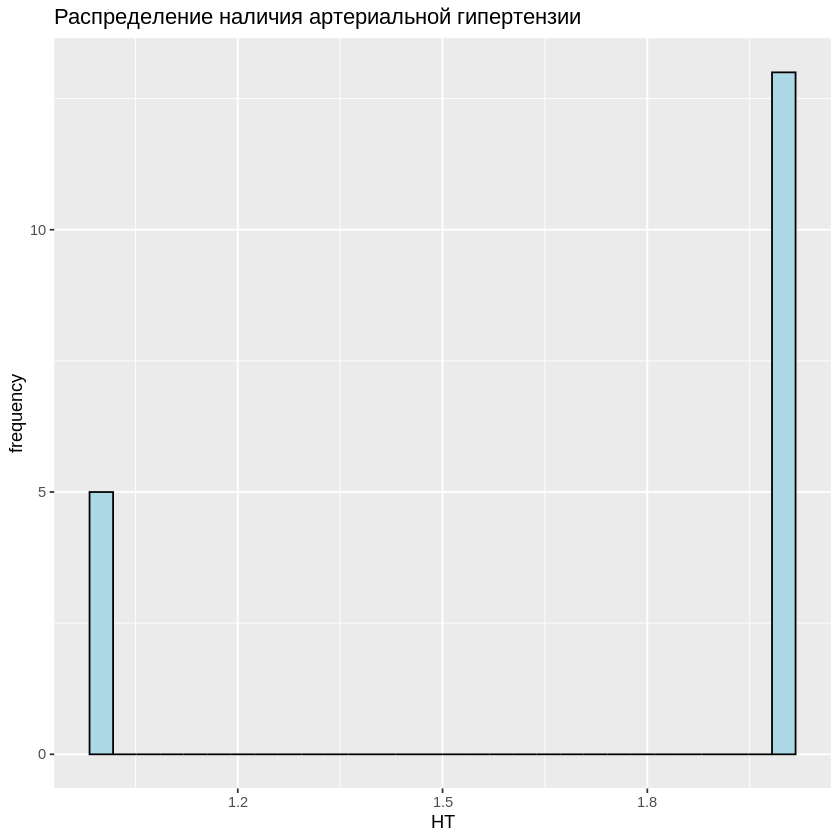

In [ ]:
data <- data %>%
  mutate(HT = as.numeric(HT))

ggplot(data, aes(HT)) +
  geom_histogram(color='black', fill='lightblue', bins = 30) +
  ggtitle("Распределение наличия артериальной гипертензии") +
  scale_y_continuous(name = "frequency")

# распределение биномиальное